# Setup

In [40]:
using LinearAlgebra
using Plots
using Distributions
using LaTeXStrings
pyplot()

include("IterativeMethods.jl")
include("KernelPlots.jl")
include("kernel_setup_script.jl")


PyPlot.matplotlib.rc("text", usetex=true)
PyPlot.matplotlib.rc("font", family="serif", serif="cm")

kernel_setup_script.jl has set up the interpolation problem. 
 Interpolation matrix is k_Z and the corresponding x axis is Z The right hand side is f_z. 
 The interpolation matrix for plotting is k_YZ and the corresponding x axis is Y. 
 The direct solution to k_Z \ f_z is X_direct_solution.

In [45]:
samples = 50

N = length(f_Z);
x0 = zeros(N);
default_prior = Diagonal(ones(N));
natural_prior = inv(k_Z' * k_Z);

In [46]:
mle_prior_N_samples = 5
mle_prior_samples = KernelPlots.mv_normal(zeros(N), default_prior, mle_prior_N_samples)

scale = 0
for i = 1:mle_prior_N_samples
    scale += norm(k_Z \ mle_prior_samples[:,i])^2
end
scale = scale / (N*mle_prior_N_samples)

mle_prior = scale * default_prior;

# Richardson and Jacobi

## How the plotting function works

For each method, a function is defined that takes a number of iterations as an input and returns the solution. These functions are put in a list that is supplied to the plotting function, KernelPlots. A list of iterations to run the methods for is also supplied. The plotting function creates a M by N grid of plots where M is the amount of methods tested and N is the amount of iterations tested. The other inputs to KernelPlots are a list of y axis labels, the x axis we plot the interpolation on, the matrix that maps a vector to the interpolation, the direct solution to the linear system, and the amounts of samples to plot.


In [47]:
R_default_opt(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,default_prior,i,IterativeMethods.Optimal)
R_natural_opt(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,natural_prior,i,IterativeMethods.Optimal)
R_mle_opt(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,mle_prior,i,IterativeMethods.Optimal)


R_default(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,default_prior,i,2.0/3)
R_natural(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,natural_prior,i,2.0/3)
R_mle(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,mle_prior,i,2.0/3)

J_default_opt(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,default_prior,i,IterativeMethods.Optimal)
J_natural_opt(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,natural_prior,i,IterativeMethods.Optimal)
J_mle_opt(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,mle_prior,i,IterativeMethods.Optimal)

J_default(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,default_prior,i,2/3)
J_natural(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,natural_prior,i,2/3)
J_mle(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,mle_prior,i,2/3)

J_mle (generic function with 1 method)

In [48]:
plotattr(:Axis)

Defined Axis attributes are:
discrete_values, draw_arrow, flip, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_guide, foreground_color_minor_grid, foreground_color_text, formatter, grid, gridalpha, gridlinewidth, gridstyle, guide, guide_position, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, lims, link, minorgrid, minorgridalpha, minorgridlinewidth, minorgridstyle, minorticks, mirror, rotation, scale, showaxis, tick_direction, tickfontcolor, tickfontfamily, tickfonthalign, tickfontrotation, tickfontsize, tickfontvalign, ticks, widen


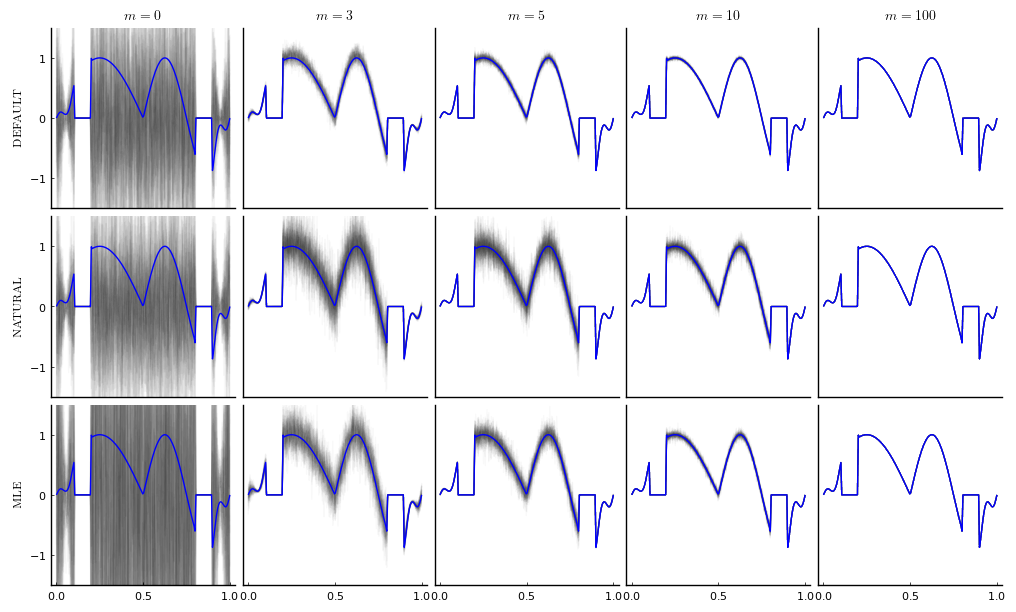

In [91]:
method_list = [R_default, R_natural, R_mle]
label_list = [
    "\\textsc{default}",
    "\\textsc{natural}",
    "\\textsc{mle}"
]
iters = [0,3,5,10,100]

R_plots = KernelPlots.kernel_plots(method_list,iters,label_list,Y,k_YZ,X_direct_solution,samples)

savefig(R_plots,"figures/richardson_default_step.pdf");

R_plots;

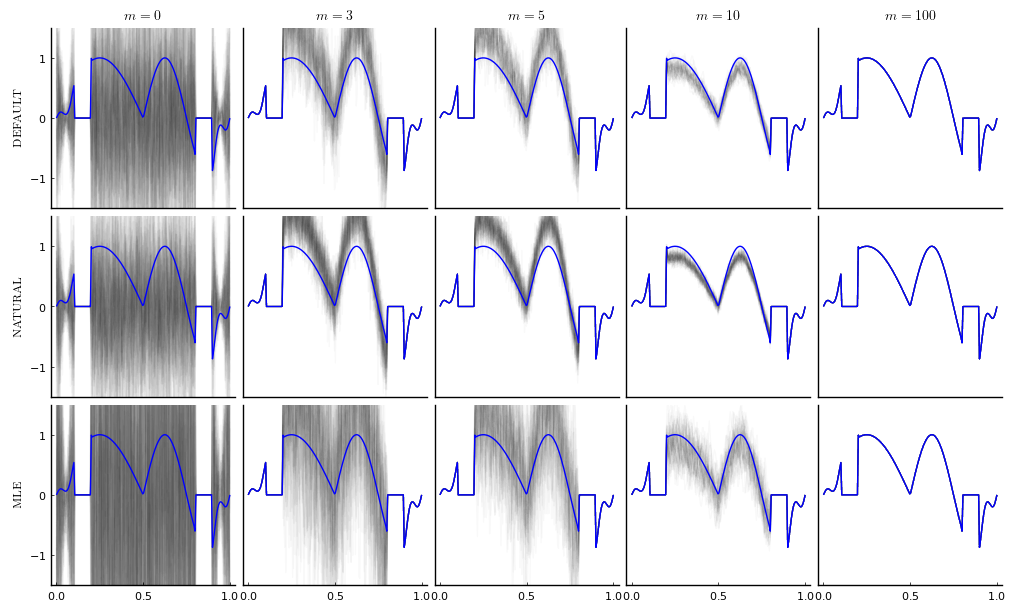

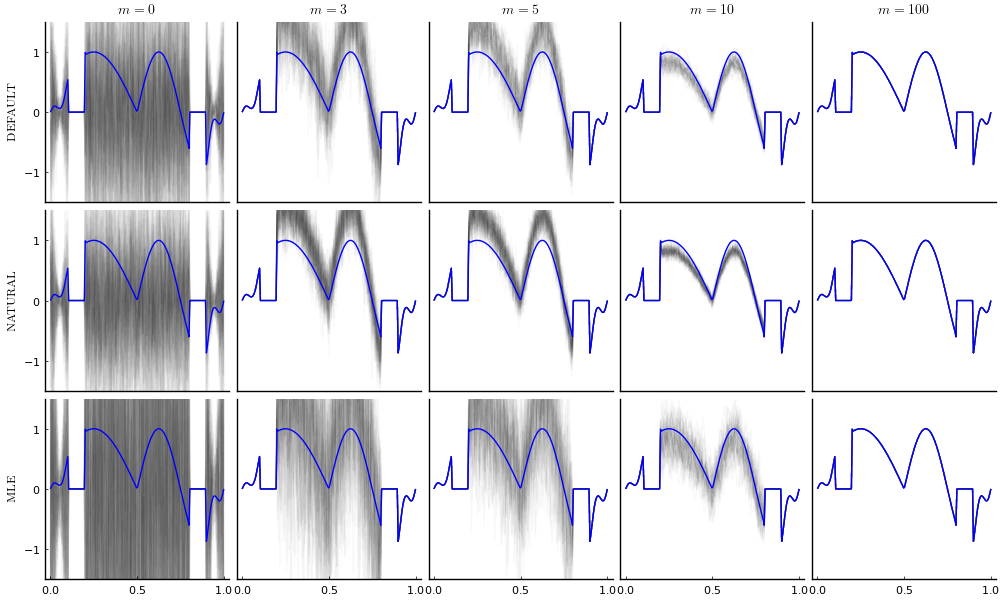

In [84]:
method_list = [R_default_opt, R_natural_opt, R_mle_opt]
label_list = [
    "\\textsc{default}",
    "\\textsc{natural}",
    "\\textsc{mle}"
]
iters = [0,3,5,10,100]

R_plots_optimal = KernelPlots.kernel_plots(method_list,iters,label_list,Y,k_YZ,X_direct_solution,samples)

savefig(R_plots_optimal, "figures/richardson_optimal_step.pdf");

R_plots_optimal

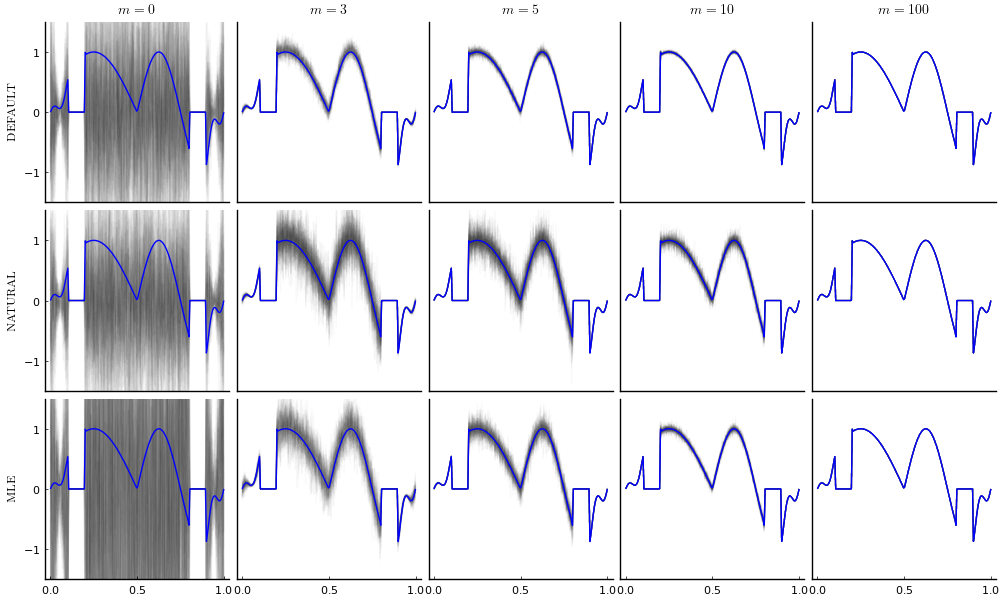

In [85]:
method_list = [J_default, J_natural, J_mle]
label_list = [
    "\\textsc{default}",
    "\\textsc{natural}",
    "\\textsc{mle}"
]
iters = [0,3,5,10,100]

J_plots = KernelPlots.kernel_plots(method_list,iters,label_list,Y,k_YZ,X_direct_solution,samples)

#savefig(R_plots,"RichardsonPlots.pdf")

J_plots

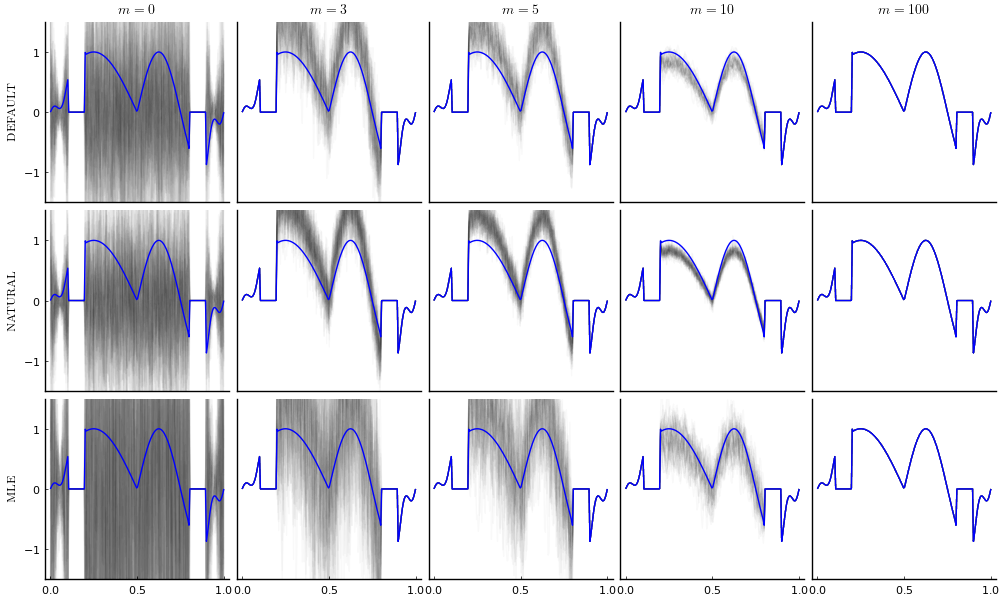

In [86]:
method_list = [J_default_opt, J_natural_opt, J_mle_opt]
label_list = [
    "\\textsc{default}",
    "\\textsc{natural}",
    "\\textsc{mle}"
]
iters = [0,3,5,10,100]

J_plots_optimal = KernelPlots.kernel_plots(method_list,iters,label_list,Y,k_YZ,X_direct_solution,samples)

#savefig(R_plots,"RichardsonPlots.pdf")

J_plots_optimal

## Principal components for Jacobi with natural prior and optimal step size

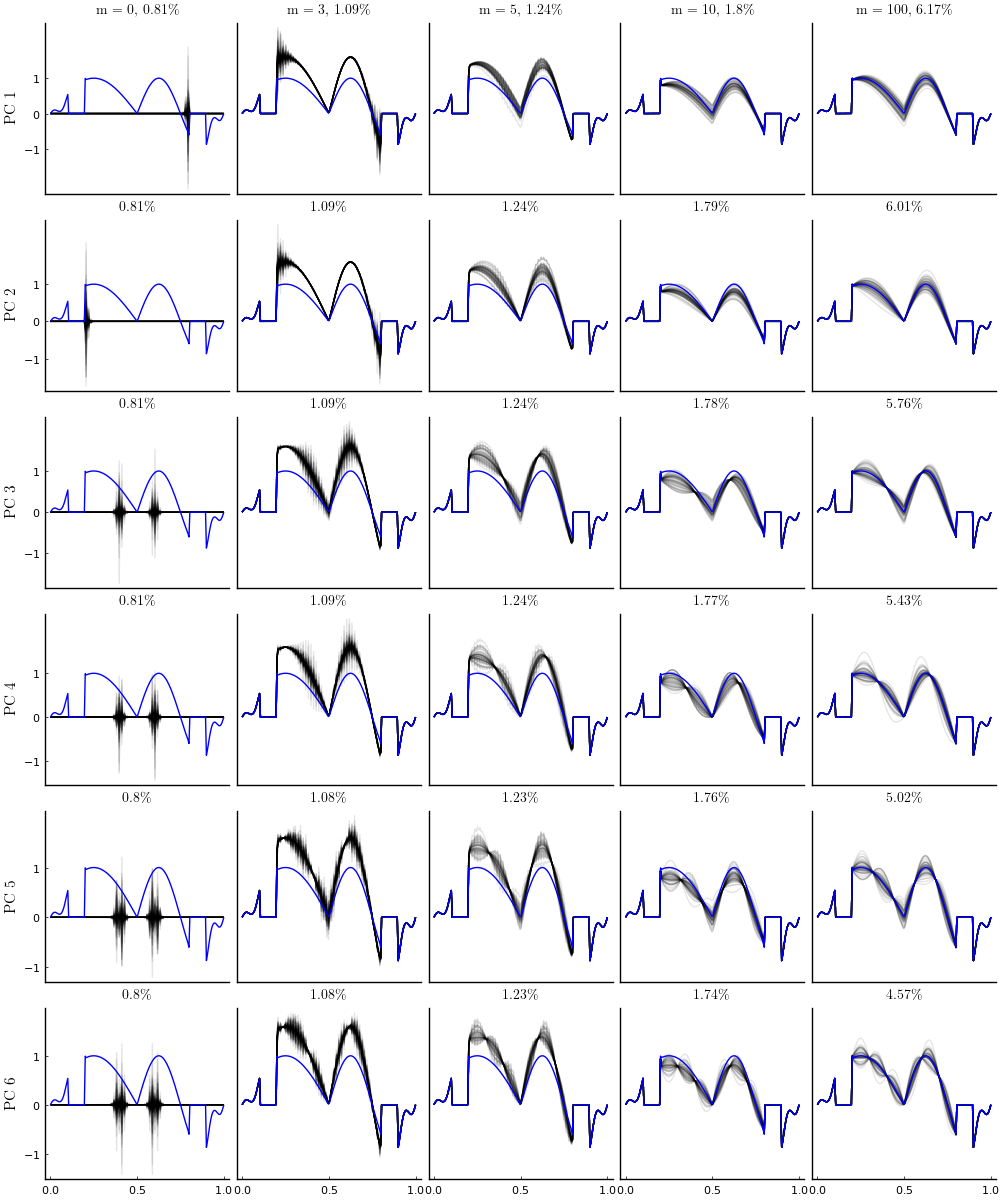

In [87]:
pc_plots = KernelPlots.pc_plots(J_natural_opt,iters,6,Y,k_YZ,X_direct_solution,samples)

#savefig(pc_plots,"PrincipalComponentPlots.pdf")

pc_plots


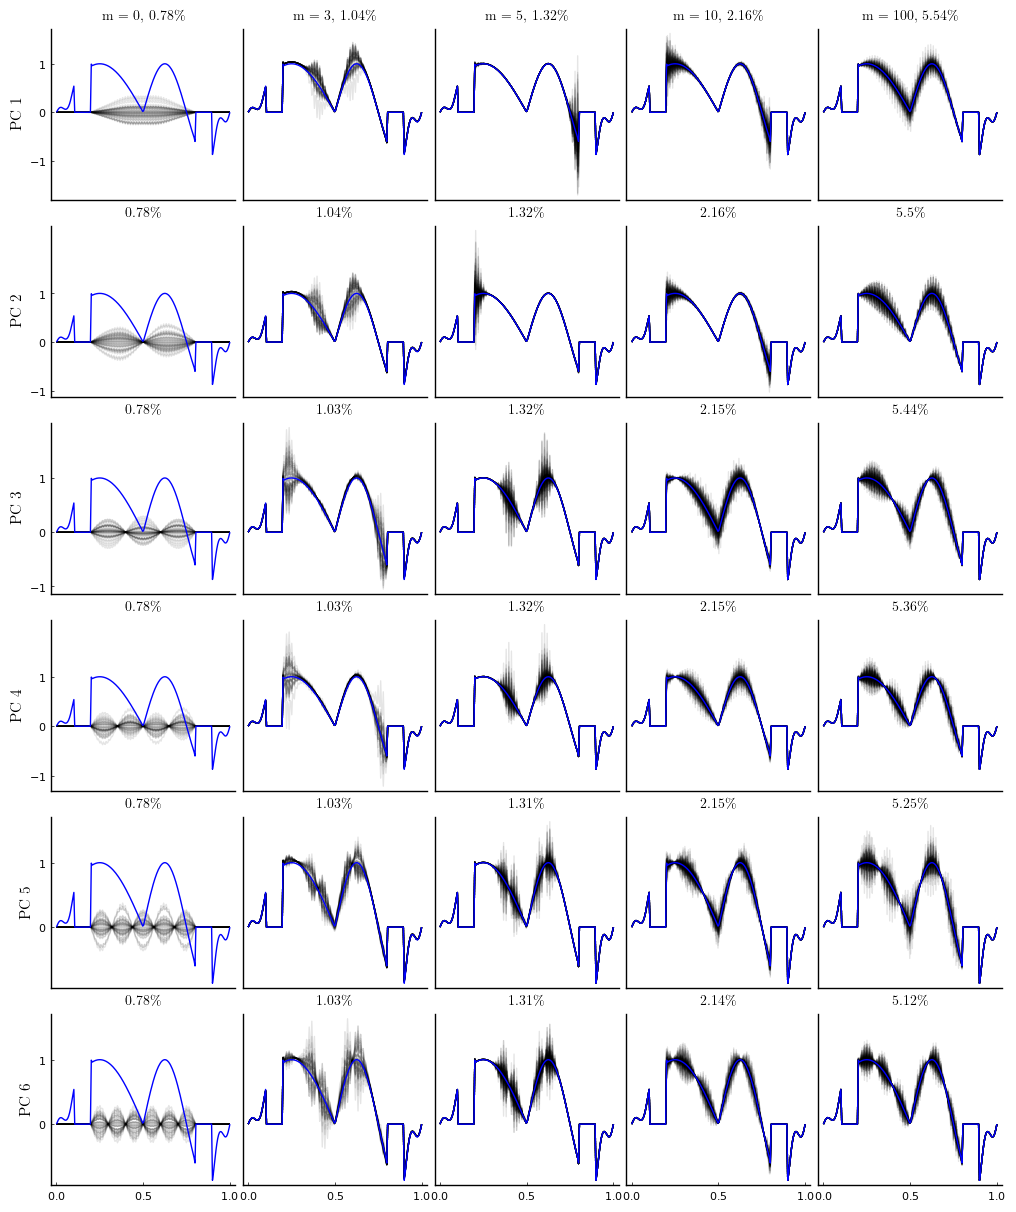

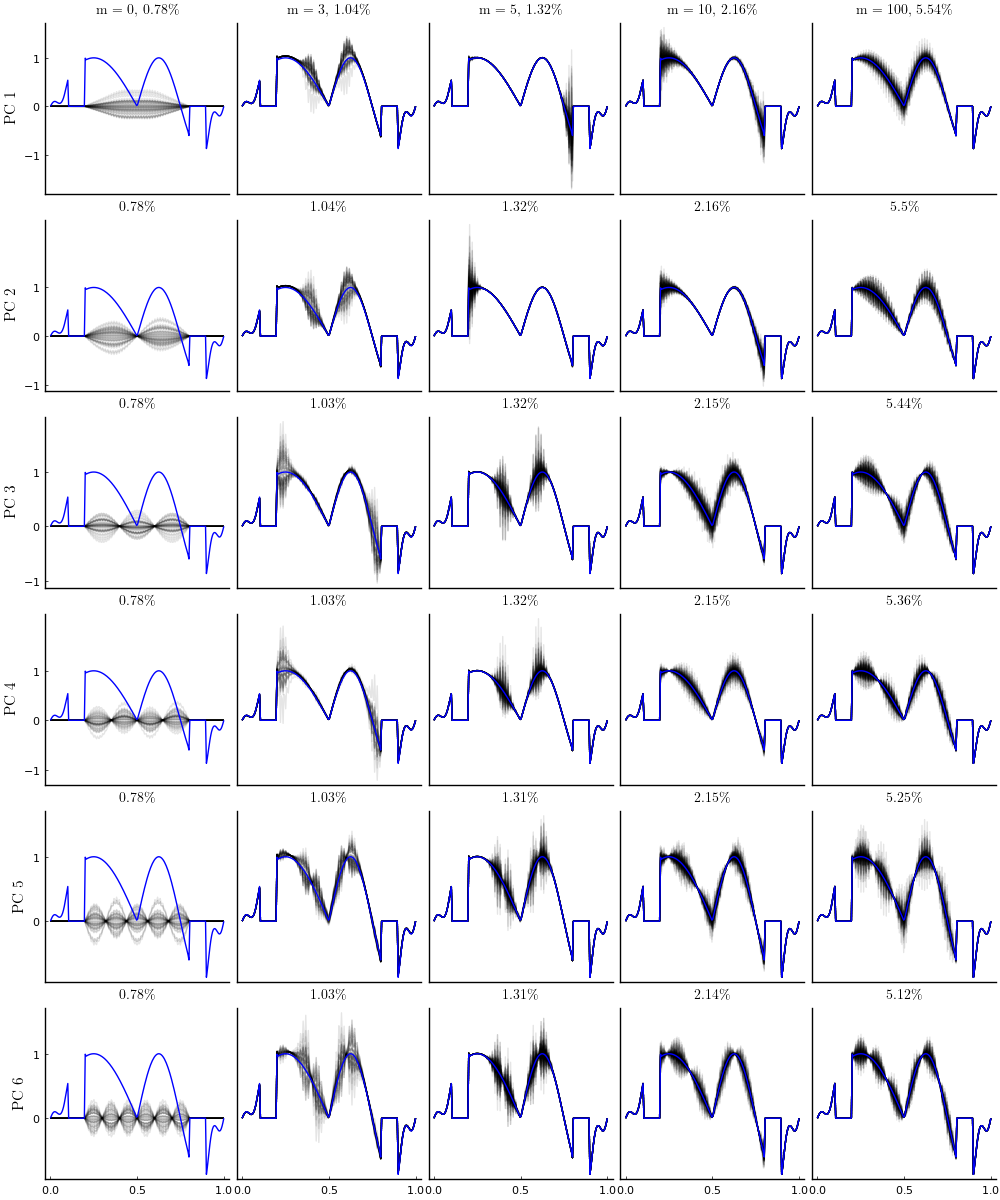

In [88]:
pc_plots = KernelPlots.pc_plots(R_mle,iters,6,Y,k_YZ,X_direct_solution,samples)

savefig(pc_plots,"figures/richardson_principal_components.pdf");

pc_plots


# Adaptive step size

I labeled the adaptive stepsize following the pattern in the existing plots but with "iii" for the step size indicator

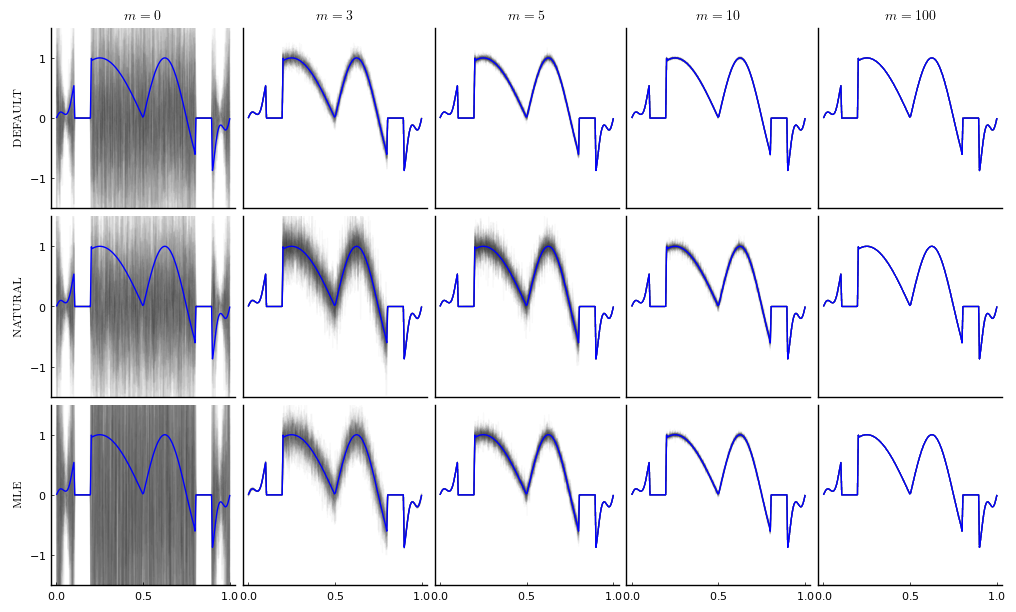

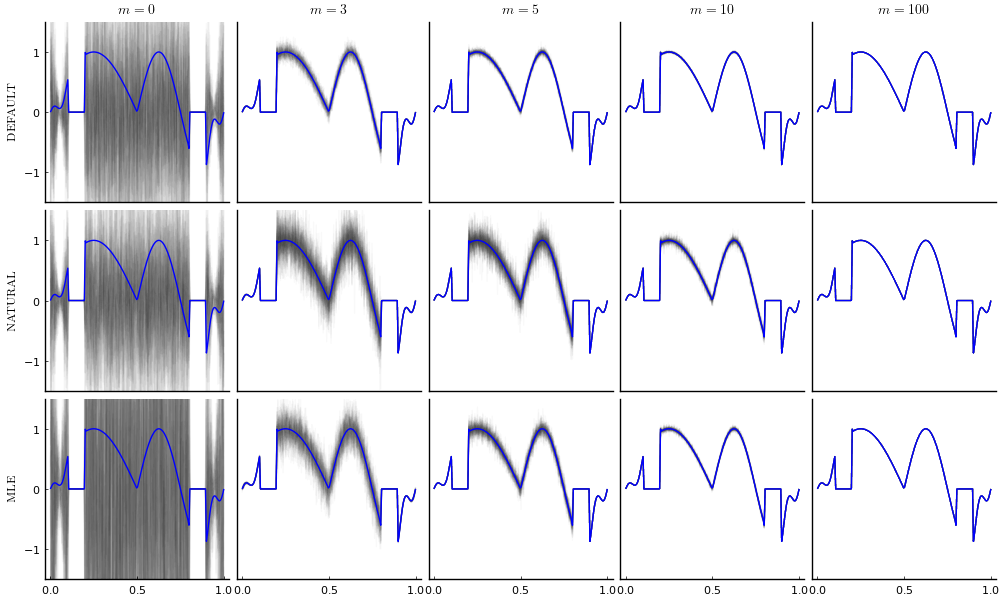

In [89]:
R_default_adp(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,default_prior,i,IterativeMethods.Adaptive)
R_natural_adp(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,natural_prior,i,IterativeMethods.Adaptive)
R_mle_adp(i) = IterativeMethods.Richardson(k_Z,f_Z,x0,mle_prior,i,IterativeMethods.Adaptive)

J_default_adp(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,default_prior,i,IterativeMethods.Adaptive)
J_natural_adp(i) = IterativeMethods.Jacobi(k_Z,f_Z,x0,natural_prior,i,IterativeMethods.Adaptive)

method_list = [R_default_adp, R_natural_adp, R_mle_adp]

label_list = [
    "\\textsc{default}",
    "\\textsc{natural}",
    "\\textsc{mle}"
]
iters = [0,3,5,10,100]

A_plots = KernelPlots.kernel_plots(method_list,iters,label_list,Y,k_YZ,X_direct_solution,samples)

savefig(A_plots,"figures/richardson_adaptive.pdf");

A_plots


# Second order Richardson

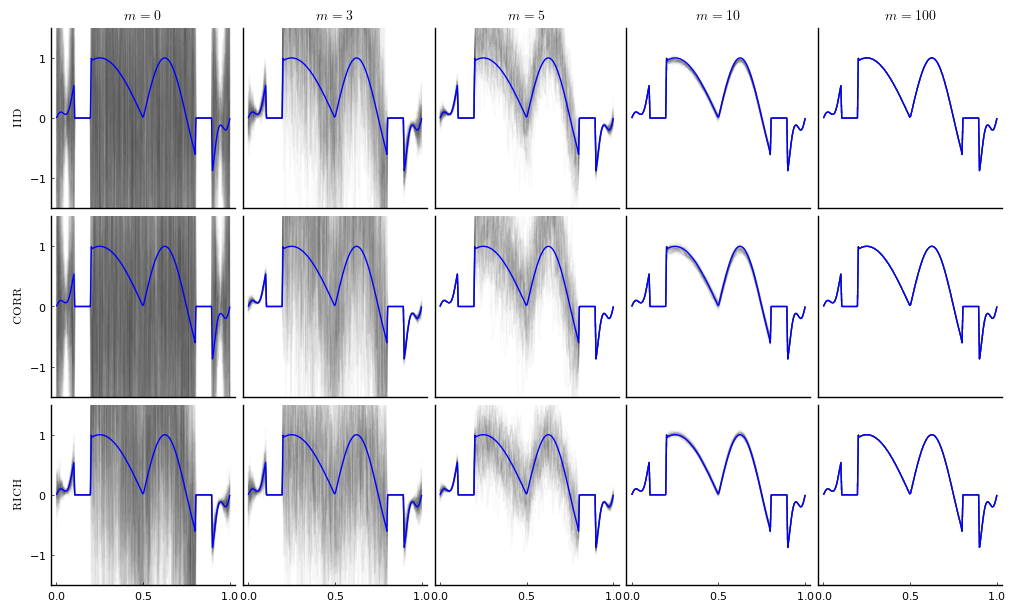

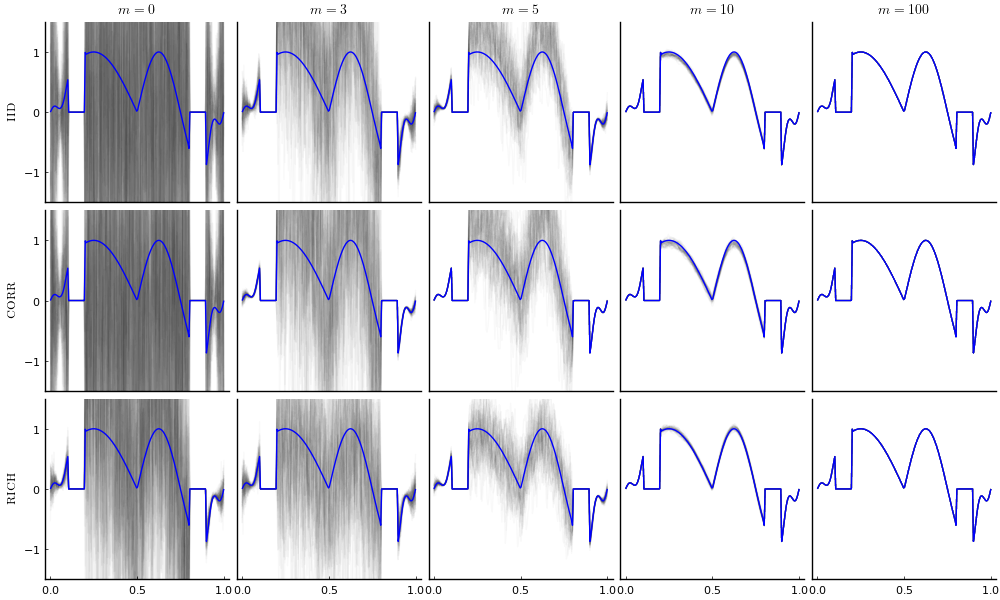

In [90]:
x02 = zeros(2*N)

big_identity = scale*Diagonal(ones(2*N)) + zeros(2*N,2*N)

big_corr = zeros(2*N, 2*N)
for i = 1:N
    big_corr[i,i] = 1
    big_corr[N+i, N+i] = 1
    big_corr[i, N+i] = 1
    big_corr[N+i, i] = 1
end
big_corr = scale*big_corr

x2, default_it_2 =  IterativeMethods.Richardson(k_Z,f_Z,x0, mle_prior, 1, IterativeMethods.Optimal)
rich_mean = [x2; zeros(N)]
rich_cov = [default_it_2 zeros(N,N); zeros(N,N) scale * Diagonal(ones(N))] + zeros(2*N, 2*N)


function R2_identity(i)
    xm,sigm = IterativeMethods.Richardson2(k_Z,f_Z,x02,big_identity,i)
    return xm[1:N], sigm[1:N,1:N]
end

function R2_corr(i)
    xm,sigm = IterativeMethods.Richardson2(k_Z,f_Z,x02,big_corr,i)
    return xm[1:N], sigm[1:N,1:N]
end

function R2_rich(i)
    xm,sigm = IterativeMethods.Richardson2(k_Z,f_Z,rich_mean,rich_cov,i)
    return xm[1:N], sigm[1:N,1:N]
end

method_list = [R2_identity, R2_corr, R2_rich]
label_list = ["\\textsc{iid}","\\textsc{corr}", "\\textsc{rich}"]
iters = [0,3,5,10,100]

S_plots = KernelPlots.kernel_plots(method_list,iters,label_list,Y,k_YZ,X_direct_solution,samples)

savefig(S_plots,"figures/richardson_second_order.pdf");

S_plots


# Principal Components for Second Order Richardson with the Natural Prior

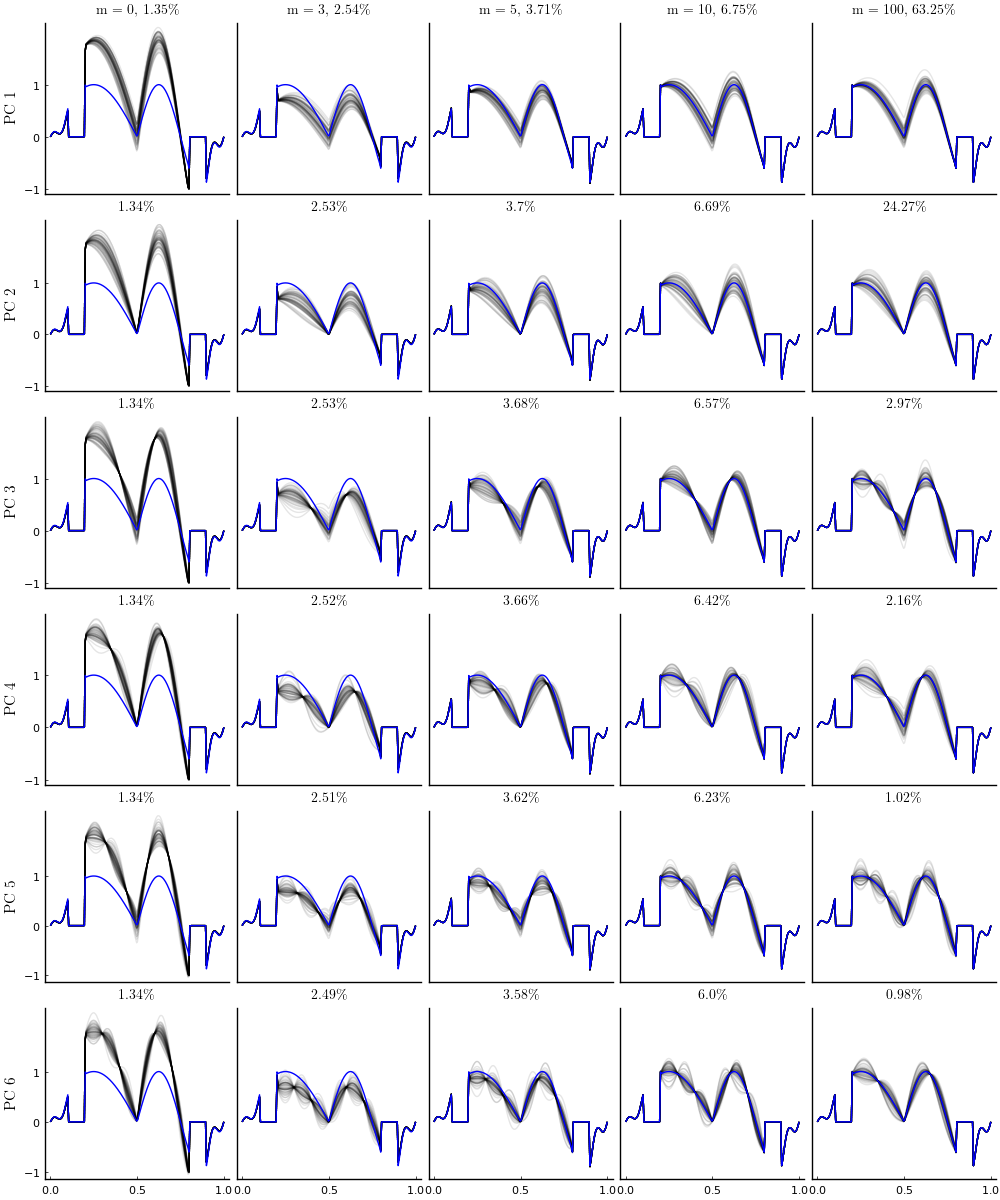

In [80]:
pc_plots_2 = KernelPlots.pc_plots(R2_rich,iters,6,Y,k_YZ,X_direct_solution,samples)

#savefig(pc_plots_2,"SecondOrderPrincipalComponentPlots.pdf")

pc_plots_2